In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/bengaluru_house_prices.csv")
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Analysis of data let's find these fundamental
shpae,info,columns,describe,null_values, duplicated,drop_duplicates

In [ ]:
dataset.shape

(13320, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
dataset.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


# Remove the duplicates from the datasets

In [ ]:
dataset.duplicated().sum()

np.int64(529)

In [ ]:
dataset.drop_duplicates(inplace = True)

In [ ]:
dataset.duplicated().sum()

np.int64(0)

In [ ]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:

dataset.shape

(12791, 9)

size columns contains object size columns like BHK and total_sqft contains like 1200-1800 Acres etc. convert into a int datatypes

In [ ]:
dataset['BHK'] = dataset['size'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2852992817.py:1: SyntaxWarning: invalid escape sequence '\d'
  dataset['BHK'] = dataset['size'].str.extract('(\d+)').astype(float)


In [ ]:
def convert_sqft(x):
    # case: range "2100 - 2850"
    if isinstance(x, str) and "-" in x:
        a,b = x.split('-')
        return (float(a) + float(b)) / 2
    # case: "34.5Sq. Meter"
    try:
        return float(x)
    except:
        return None

dataset['total_sqft'] = dataset['total_sqft'].apply(convert_sqft)

In [ ]:
dataset['total_sqft'] = dataset['total_sqft'].astype(float)

In [ ]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12745 non-null  float64
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
 9   BHK           12775 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.1+ MB


In [ ]:
dataset['price_per_sqft'] = dataset['price']*100000 / dataset['total_sqft']


In [ ]:
def remove_ppsf_outliers(subdf):
    low = subdf['price_per_sqft'].quantile(0.10)
    high = subdf['price_per_sqft'].quantile(0.90)
    return subdf[(subdf['price_per_sqft'] > low) & (subdf['price_per_sqft'] < high)]

dataset = dataset.groupby('location').apply(remove_ppsf_outliers).reset_index(drop=True)


/tmp/ipython-input-1642360610.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset = dataset.groupby('location').apply(remove_ppsf_outliers).reset_index(drop=True)


In [ ]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,2 BHK,NaN,1100.0,2.0,1.0,70.0,2.0,6363.636364
1,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1672.0,3.0,2.0,150.0,3.0,8971.291866
2,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1750.0,3.0,3.0,149.0,3.0,8514.285714
3,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1750.0,3.0,2.0,150.0,3.0,8571.428571
4,Super built-up Area,18-May,Devarachikkanahalli,3 BHK,NaN,1250.0,2.0,3.0,44.0,3.0,3520.000000


In [ ]:
dataset = dataset[dataset['total_sqft'] >= 300]
dataset = dataset[dataset['total_sqft'] <= 4000]

In [ ]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,2 BHK,NaN,1100.0,2.0,1.0,70.0,2.0,6363.636364
1,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1672.0,3.0,2.0,150.0,3.0,8971.291866
2,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1750.0,3.0,3.0,149.0,3.0,8514.285714
3,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1750.0,3.0,2.0,150.0,3.0,8571.428571
4,Super built-up Area,18-May,Devarachikkanahalli,3 BHK,NaN,1250.0,2.0,3.0,44.0,3.0,3520.000000


In [ ]:
dataset_copy = dataset.copy()

In [ ]:
dataset_copy.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,2 BHK,NaN,1100.0,2.0,1.0,70.0,2.0,6363.636364
1,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1672.0,3.0,2.0,150.0,3.0,8971.291866
2,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1750.0,3.0,3.0,149.0,3.0,8514.285714
3,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1750.0,3.0,2.0,150.0,3.0,8571.428571
4,Super built-up Area,18-May,Devarachikkanahalli,3 BHK,NaN,1250.0,2.0,3.0,44.0,3.0,3520.000000


In [ ]:
dataset_copy.drop(columns =['size','society','area_type','availability','price_per_sqft'], inplace = True)

In [ ]:
dataset_copy.head()

,location,total_sqft,bath,balcony,price,BHK
0,Devarabeesana Halli,1100.0,2.0,1.0,70.0,2.0
1,Devarabeesana Halli,1672.0,3.0,2.0,150.0,3.0
2,Devarabeesana Halli,1750.0,3.0,3.0,149.0,3.0
3,Devarabeesana Halli,1750.0,3.0,2.0,150.0,3.0
4,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3.0


In [ ]:
dataset_copy = dataset_copy[(dataset_copy['total_sqft'] >= 300) & (dataset_copy['total_sqft'] <= 4000)]


In [ ]:
dataset_copy.head()

,location,total_sqft,bath,balcony,price,BHK
0,Devarabeesana Halli,1100.0,2.0,1.0,70.0,2.0
1,Devarabeesana Halli,1672.0,3.0,2.0,150.0,3.0
2,Devarabeesana Halli,1750.0,3.0,3.0,149.0,3.0
3,Devarabeesana Halli,1750.0,3.0,2.0,150.0,3.0
4,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3.0


In [ ]:
dataset_copy.shape

(8701, 6)

In [ ]:
# 1. total_sqft clean — logical rule
dataset_copy = dataset_copy[(dataset_copy['total_sqft'] >= 300) &
                            (dataset_copy['total_sqft'] <= 4000)]

# 2. price clean — IQR rule
Q1 = dataset_copy['price'].quantile(0.25)
Q3 = dataset_copy['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

dataset_copy = dataset_copy[(dataset_copy['price'] >= lower) &
                            (dataset_copy['price'] <= upper)]


In [ ]:
numerical_col = dataset_copy.select_dtypes(include = ['float'])

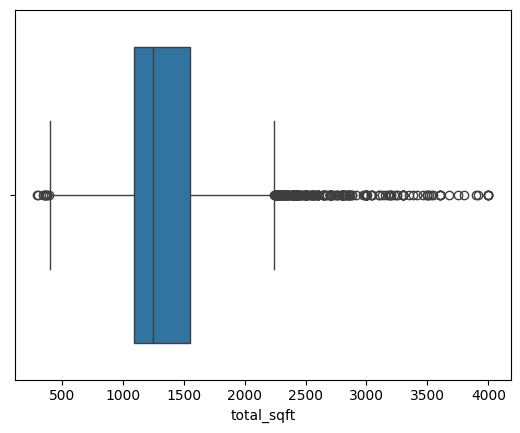

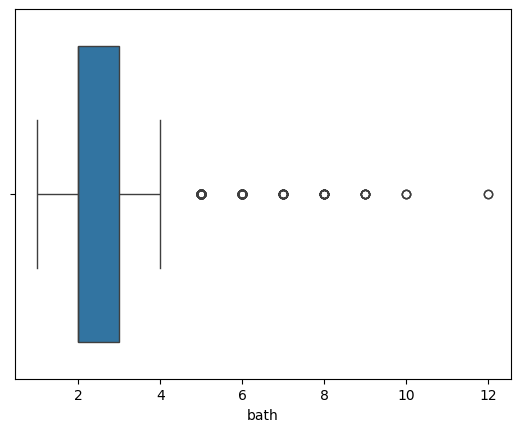

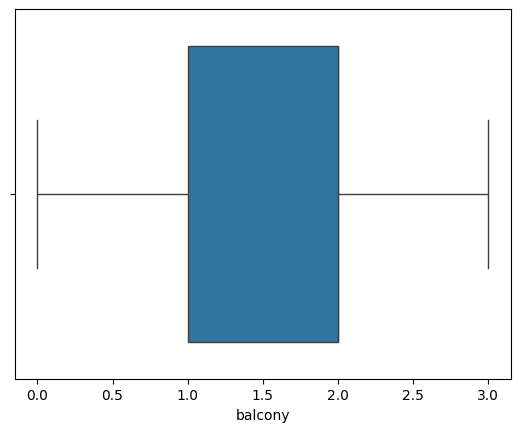

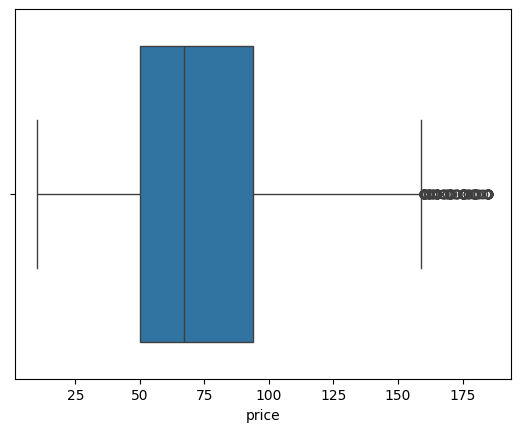

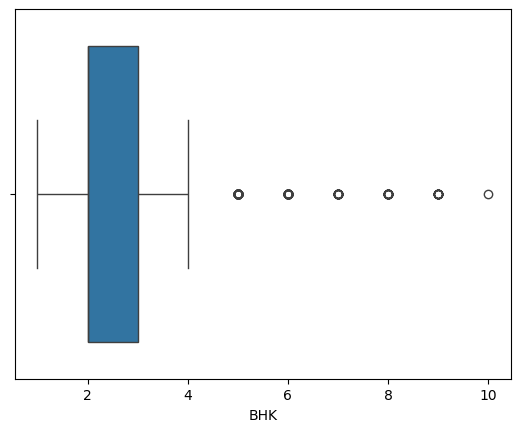

In [ ]:
for col in numerical_col:
  sns.boxplot(x = dataset_copy[col])
  plt.show()

In [ ]:
dataset_copy['location'].value_counts()

,count
location,
Whitefield,365
Sarjapur Road,274
Electronic City,229
Kanakpura Road,196
Thanisandra,179
...,...
Govindapura,1
"Thanisandra Main Road,",1
Thippasandra,1


In [ ]:
dataset_copy.isnull().sum()

,0
location,0
total_sqft,0
bath,39
balcony,200
price,0
BHK,2


In [ ]:
dataset_copy['bath'] = dataset_copy['bath'].fillna(dataset_copy['bath'].median())

dataset_copy['BHK'] = dataset_copy['BHK'].fillna(dataset_copy['BHK'].median())

dataset_copy['balcony'] = dataset_copy['balcony'].fillna(0)

In [ ]:
dataset_copy.isnull().sum()

,0
location,0
total_sqft,0
bath,0
balcony,0
price,0
BHK,0


In [ ]:
location_stats = dataset_copy['location'].value_counts()
locations_less_than_10 = location_stats[location_stats <= 10].index
dataset_copy['location'] = dataset_copy['location'].apply(lambda x : 'other' if x in locations_less_than_10 else x)

# one hot
dummies = pd.get_dummies(dataset_copy['location'], drop_first=True)
dataset_copy = pd.concat([dataset_copy, dummies], axis=1)
dataset_copy.drop('location', axis=1, inplace=True)


In [ ]:
dataset_copy.head()

,total_sqft,bath,balcony,price,BHK,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1100.0,2.0,1.0,70.0,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1672.0,3.0,2.0,150.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1750.0,3.0,3.0,149.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1750.0,3.0,2.0,150.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1250.0,2.0,3.0,44.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
bool_cols = dataset_copy.select_dtypes(include=['bool']).columns.tolist()

# 2. Loop chala ke bool → int convert karo
for col in bool_cols:
    dataset_copy[col] = dataset_copy[col].astype(int)

In [ ]:
dataset_copy.head()

,total_sqft,bath,balcony,price,BHK,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1100.0,2.0,1.0,70.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1672.0,3.0,2.0,150.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1750.0,3.0,3.0,149.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1750.0,3.0,2.0,150.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1250.0,2.0,3.0,44.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dataset_copy.shape

(7969, 176)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

In [ ]:
X = dataset_copy.drop('price', axis=1)
y = dataset_copy['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=0.001),
    "Decision Tree": DecisionTreeRegressor(max_depth=12),
    "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200),
    "XGBoost": XGBRegressor(
        n_estimators=250,
        learning_rate=0.06,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        reg_lambda=1
    )
}

In [ ]:
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"\n{name}")
    print("-" * 40)
    print(f"R² Score : {r2}")
    print(f"MAE      : {mae}")
    print(f"RMSE     : {rmse}")

In [ ]:
for name, model in models.items():
    evaluate_model(name, model)



Linear Regression
----------------------------------------
R² Score : 0.6804720106665678
MAE      : 14.181049976199214
RMSE     : 20.420222311558415

Ridge
----------------------------------------
R² Score : 0.678296984121648
MAE      : 14.207950972172526
RMSE     : 20.48960465178226

Lasso
----------------------------------------
R² Score : 0.679469575034194
MAE      : 14.206777945600203
RMSE     : 20.452228785945746

Decision Tree
----------------------------------------
R² Score : 0.6395884548114507
MAE      : 14.819449391312071
RMSE     : 21.68729364346081

Random Forest
----------------------------------------
R² Score : 0.7065265112795087
MAE      : 12.61966275492951
RMSE     : 19.56998307257749

Gradient Boosting
----------------------------------------
R² Score : 0.7112752154767152
MAE      : 13.547280765330019
RMSE     : 19.411006076118316

XGBoost
----------------------------------------
R² Score : 0.725192356626415
MAE      : 12.97633128488079
RMSE     : 18.937402789013234
